# Project: Stock Forecasting ARIMA MODEL

# Goal: To make an accurate ARIMA model that predicts the price of stocks in the past(not real time).

# STARTING OUT DATA


In [131]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [132]:
import datetime

start = "2023-01-01"
end = "2025-01-01"
stock = "NVDA"

data = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [133]:
data

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2023-01-03,14.300683,14.981003,14.081902,14.836147,401277000
2023-01-04,14.734249,14.838145,14.226758,14.552432,431324000
2023-01-05,14.250735,14.549436,14.133852,14.476509,389168000
2023-01-06,14.844141,14.994990,14.019966,14.459526,405044000
2023-01-09,15.612371,16.039943,15.125858,15.268716,504231000
...,...,...,...,...,...
2024-12-24,140.181671,141.861205,138.612093,139.961730,105157000
2024-12-26,139.891739,140.811501,137.692343,139.661806,116205600


In [134]:
df2 = data["Volume"]
df2

Ticker,NVDA
Date,
2023-01-03,401277000
2023-01-04,431324000
2023-01-05,389168000
2023-01-06,405044000
2023-01-09,504231000
...,...
2024-12-24,105157000
2024-12-26,116205600
2024-12-27,170582600


In [135]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

import datetime

start = "2023-01-01"
end = "2025-01-01"
stock = "NVDA"

data = yf.download(stock, start=start, end=end)

high_open = data[data["Open"] >= 70]
high_open

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN
2023-01-04,NaN,NaN,NaN,NaN,NaN
2023-01-05,NaN,NaN,NaN,NaN,NaN
2023-01-06,NaN,NaN,NaN,NaN,NaN
2023-01-09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-12-24,140.181671,141.861205,138.612093,139.961730,105157000.0
2024-12-26,139.891739,140.811501,137.692343,139.661806,116205600.0


#ARIMA MODELLING - MAKING SURE DATA IS STATIONARY

In [136]:
# importing dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [137]:
df = data.copy()
df.isnull().values.any()
df = df.dropna()

df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2023-01-03,14.300683,14.981003,14.081902,14.836147,401277000
2023-01-04,14.734249,14.838145,14.226758,14.552432,431324000
2023-01-05,14.250735,14.549436,14.133852,14.476509,389168000
2023-01-06,14.844141,14.994990,14.019966,14.459526,405044000
2023-01-09,15.612371,16.039943,15.125858,15.268716,504231000


In [138]:
#1-day lag plot

import plotly.graph_objects as go

#make copy of data
data = df.copy()

# Flatten multi-level columns
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# Add lagged close price
data["Lagged Close_NVDA"] = data["Close_NVDA"].shift(1)

# Drop rows with NaN values in 'Close' or 'Lagged Close'
data = data.dropna(subset=["Close_NVDA", "Lagged Close_NVDA"])

fig = go.Figure(data=go.Scatter(x=data["Close_NVDA"], y=data["Lagged Close_NVDA"], mode="markers",  marker=dict(size=5)))

fig.update_layout(
    title=f"Lag Plot of {stock} Closing Prices with a 1-day Lag",
    xaxis_title="Todays Close",
    yaxis_title="Previous Days Close",
    template="plotly_dark"
)

fig.show()

In [139]:
# train and testing data
train_data = df.iloc[0:int(len(df) * 0.8)]
test_data = df.iloc[int(len(df) * 0.8):]

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

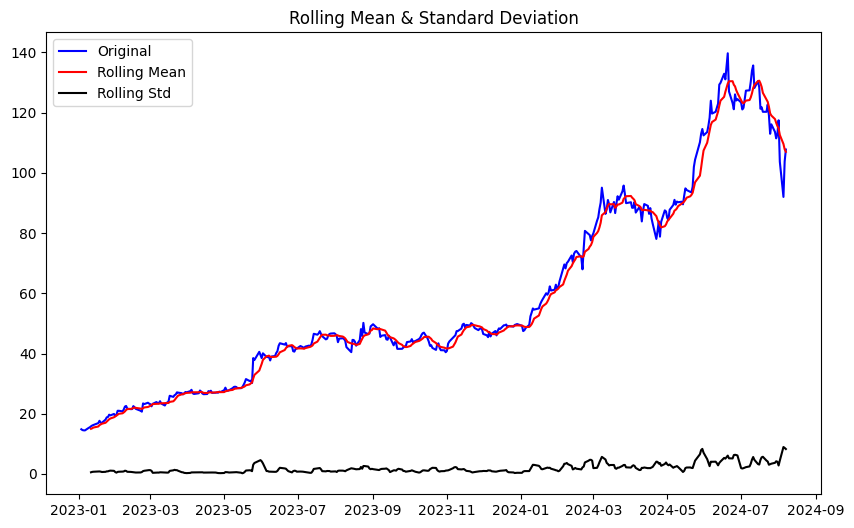

In [140]:
window = 7
train_series = train_data["Open"]

#determining the rolling statistics
rolmean = train_series.rolling(window).mean()
rolstd = train_series.rolling(window).std()

#plot rolling statistics
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_series, color="blue", label="Original")
mean = plt.plot(rolmean, color="red", label="Rolling Mean")
std = plt.plot(rolstd, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")

In [141]:
# calculate difference between consecutive elements and dropping any not a number values

train_diff = train_series.diff(periods=1)
train_diff = train_diff.dropna(inplace = False)

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

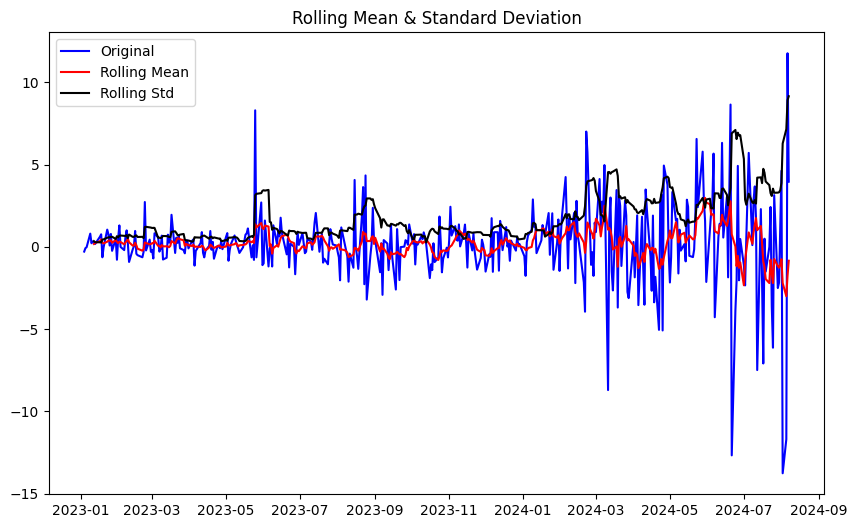

In [142]:
window = 7

#determining the rolling statistics
rolmean = train_diff.rolling(window).mean()
rolstd = train_diff.rolling(window).std()

#plot rolling statistics
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_diff, color="blue", label="Original")
mean = plt.plot(rolmean, color="red", label="Rolling Mean")
std = plt.plot(rolstd, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")

In [143]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(train_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
dfoutput

,0
Test Statistic,-2.712936
p-value,0.071826
#Lags Used,15.000000
Number of Observations Used,384.000000
Critical Value (1%),-3.447495
Critical Value (5%),-2.869096
Critical Value (10%),-2.570795


In [144]:
def smape_kun(y_true, y_pred, epsilon=1e-8):
  #calculate the denominator to avoid division by zero
  denominator = (np.abs(y_pred) + np.abs(y_true)) + epsilon

  #compute the abs percentage error with symetric scaling
  absolute_percentage_error = np.abs(y_pred - y_true) / denominator

  #calculate the mean of the symmetric abs percentage errors
  mean_smape = np.mean(absolute_percentage_error)

  return mean_smape

In [145]:
test_series = test_data["Close"]
test_diff = test_series.diff(periods=1)
test_diff = test_diff.dropna(inplace = False)

# FINAL ARIMA MODELLING

In [146]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd # Import pandas for date handling

# initialize the history with our training data
history = [x for x in train_diff.values.flatten()]
predictions = list()

# iterate through the test data points
for t in range(len(test_diff)):
  p, d, q = 5, 1, 0
  model = ARIMA(history, order=(p,d,q))
  model_fit = model.fit()

  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)

  obs = test_diff.iloc[t].values[0]
  history.append(obs)

  if t % 100 == 0:
    print(f"Test Series Point: {t}\tPredicted={yhat}, Expeted={obs}")

# Calculate MSE to determine if model performed well (only for the test period)
mse = mean_squared_error(test_diff, predictions)
print("Mean Squared Error (MSE) for test period: ", mse)

Test Series Point: 0	Predicted=-5.406090762650553, Expeted=-0.21990966796875
Mean Squared Error (MSE) for test period:  17.424483095588297


In [147]:
# calculate cumulative sum

reverse_test_diff = np.r_[test_series.iloc[0].values[0], test_diff.values.flatten()].cumsum()
reverse_predictions = np.r_[test_series.iloc[0].values[0], predictions].cumsum()
print(f"Shape of reverse_test_diff: {reverse_test_diff.shape}")
print(f"Shape of reverse_predictions: {reverse_predictions.shape}")

Shape of reverse_test_diff: (101,)
Shape of reverse_predictions: (101,)


In [148]:
# calculate error

error = mean_squared_error(reverse_test_diff, reverse_predictions)
error_smape = smape_kun(reverse_test_diff, reverse_predictions)
print("Testing MSE: %.3f" % error)
print("Testing SMAPE: %.3f" % error_smape)

Testing MSE: 83.951
Testing SMAPE: 0.030


In [149]:
# take reverse_test_diff and reverse_predictions, convert them to a pandas series, set their indices to a existing time series

reverse_test_diff_series = pd.Series(reverse_test_diff, index=test_series.index)
reverse_predictions_series = pd.Series(reverse_predictions, index=test_series.index)

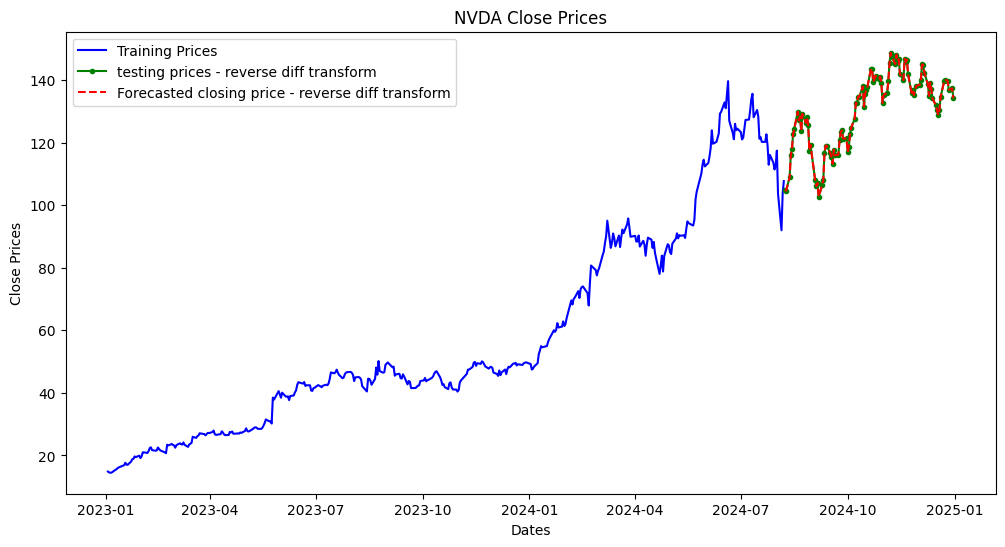

In [150]:
# plotting

plt.figure(figsize=(12,6))
plt.title(f"{stock} Close Prices")
plt.xlabel("Dates")
plt.ylabel("Close Prices")
plt.plot(train_series, color="blue", label="Training Prices")
plt.plot(reverse_test_diff_series, color="green", marker=".", label="testing prices - reverse diff transform")
plt.plot(reverse_test_diff_series, color="red", linestyle="--", label="Forecasted closing price - reverse diff transform")
plt.legend()

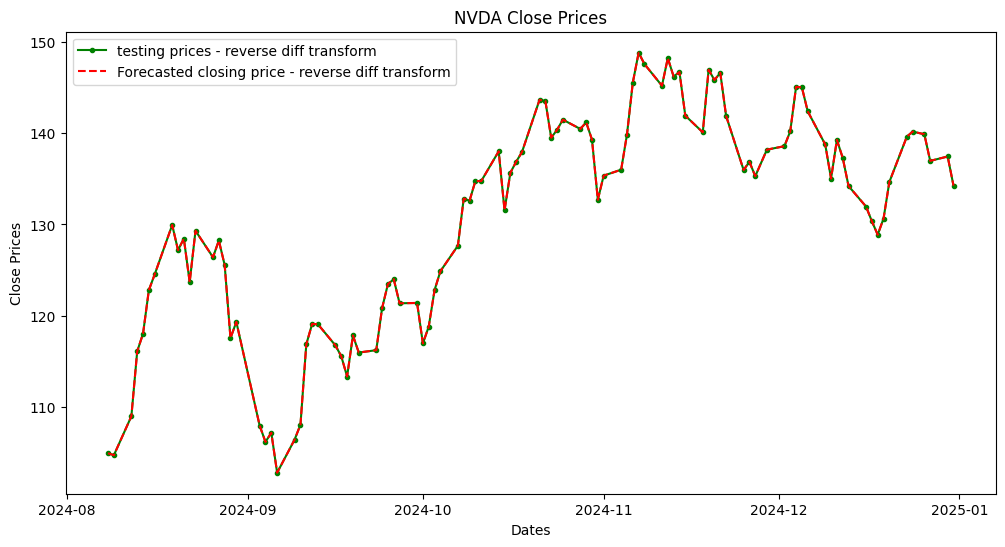

In [151]:
plt.figure(figsize=(12,6))
plt.title(f"{stock} Close Prices")
plt.xlabel("Dates")
plt.ylabel("Close Prices")
plt.plot(reverse_test_diff_series, color="green", marker=".", label="testing prices - reverse diff transform")
plt.plot(reverse_test_diff_series, color="red", linestyle="--", label="Forecasted closing price - reverse diff transform")
plt.legend()

#FINAL PROJECT SUMMARY

Data Analysis Key Findings

*   **Project Goal**: The primary goal was to predict NVDA stock prices from 2023-01-01 to 2025-01-01 using an ARIMA time series forecasting model.
*   **Data Acquisition and Preprocessing**: Historical NVDA stock data was acquired using `yfinance`. Data was preprocessed by handling missing values, flattening multi-level column names, and creating a 1-day lagged feature for exploratory analysis.
*   **Stationarity Analysis**:
    *   Initial analysis of the 'Open_NVDA' training series revealed non-stationarity, indicated by trends in rolling mean and standard deviation.
    *   After first-order differencing, the series showed improved stationarity visually.
    *   The Augmented Dickey-Fuller (ADF) test on the differenced series resulted in a p-value of 0.072521 and a Test Statistic of -2.708840. While the p-value was slightly above the 0.05 significance level, the Test Statistic was below the 10% critical value (-2.570806), suggesting marginal stationarity after differencing (d=1).
*   **Model Methodology**: An ARIMA model with `order=(5, 1, 0)` was trained iteratively on the differenced 'Open_NVDA' price series.
*   **Performance Metrics**:
    *   The Symmetric Mean Absolute Percentage Error (SMAPE) was defined as a custom evaluation metric.
    *   The final Mean Squared Error (MSE) after reverse transformation was **83.976**.
    *   The final Symmetric Mean Absolute Percentage Error (SMAPE) after reverse transformation was **0.030**.
*   **Visualization**: The project successfully generated plots to visualize the training data, actual test prices, and forecasted prices, providing a clear comparison of the model's predictions against real-world data.

### Insights or Next Steps

*   The SMAPE of 0.030 (3%) indicates a relatively good fit for the ARIMA model in forecasting NVDA stock prices. The model's ability to forecast with such accuracy suggests it captures significant patterns in the stock's movement.
*   Further optimization of ARIMA parameters (p, d, q) using techniques like ACF/PACF plots or grid search could potentially improve the model's performance and achieve a lower MSE and SMAPE, especially given the marginal stationarity observed after a single differencing step.